<a href="https://colab.research.google.com/github/gbagolin/ttr-project/blob/master/binary_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O faces.zip "https://www.dropbox.com/s/t164dl4ulgcz5mq/faces.zip?dl=0"

In [ ]:
!unzip faces.zip

In [22]:
from sklearn.svm import SVC
from upload_dataset import upload_dataset
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

from upload_dataset import upload_dataset
import numpy as np
import cv2

#Parameters initialization
NUM_CLASSES = 2

#Dataset initialization
labels = []
features = []
class_list = [0,6]

for i in class_list: 

  print("Iteration: ", i)
  tmp_dataset, tmp_labels = upload_dataset('faces/{0}/'.format(i), i // max(class_list))
  labels.append(tmp_labels)

  for img in tmp_dataset: 
    features.append(img.reshape(120000))

Iteration:  0
Iteration:  6


In [23]:
X = np.array(features)
print("N Row = N Elements: {}, N Col = N Features: {}".format(X.shape[0], X.shape[1]))

N Row = N Elements: 1948, N Col = N Features: 120000


In [24]:
#Labels Declaration 
y = []
for label in labels:
  for element in label: 
    y.append(element)

In [25]:
from sklearn.model_selection import train_test_split
random_state = 0
# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.1, stratify=y,
                     random_state=random_state)

y_train = np.array(y_train)
y_test = np.array(y_test)

print("N Elements train: ", X_train.shape[0])
print("N Elements test: ", X_test.shape[0])

N Elements train:  1753
N Elements test:  195


In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#KNN model initialization
model = make_pipeline(StandardScaler(),
                    KNeighborsClassifier(n_neighbors=100
                       ))
#KNN model training
model.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=100, p=2,
                                      weights='uniform'))],
         verbose=False)

In [27]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [28]:
from sklearn import metrics
# Model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


In [29]:
from sklearn.metrics import confusion_matrix
#Confusion Matrix
cmc = confusion_matrix(y_test, y_pred)

Classifier accuracy: 80.00%
Classifier precision wrt First Class: 0.92
Classifier precision wrt Second Class: 0.73
Classifier recall wrt First Class: 0.66
Classifier recall wrt Second Class: 0.94


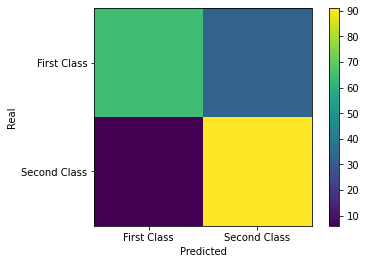

In [30]:

#Results analysis
plt.imshow(cmc)
plt.colorbar()
plt.xlabel("Predicted")
plt.xticks([0,1],["First Class","Second Class"])
plt.yticks([0,1], ["First Class","Second Class"])
plt.ylabel("Real")

accuracy = np.sum(cmc.diagonal())/np.sum(cmc)

precision_0 = cmc[0,0] / np.sum(cmc[:,0])
precision_1 = cmc[1,1]/ np.sum(cmc[:,1])

recall_0 = cmc[0,0]/ np.sum(cmc[0,:])
recall_1 = cmc[1,1]/ np.sum(cmc[1,:])

print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')
print('Classifier precision wrt First Class: ' + "{0:.2f}".format(precision_0))
print('Classifier precision wrt Second Class: ' + "{0:.2f}".format(precision_1))
print('Classifier recall wrt First Class: ' + "{0:.2f}".format(recall_0))
print('Classifier recall wrt Second Class: ' + "{0:.2f}".format(recall_1))

plt.show()